# <center>ICSDG</center>

In [6]:
# import required Libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Read required Data
data_folder = Path("./Data")

wr_production = pd.read_csv(data_folder / "WheatRiceProduction.csv")
wrp_len = len(wr_production)

wr_export = pd.read_csv(data_folder / "WheatRiceExport.csv")
wre_len = len(wr_export) + 1

sww_production = pd.read_csv(data_folder / "StatewiseWheatProduction.csv")
swwp_len = len(sww_production)

swr_production = pd.read_csv(data_folder / "StatewiseRiceProduction.csv")
swrp_len = len(swr_production)

In [8]:
# Functions for ploting regression line and predicting estimated value.
def drawRegressionPlot(X, Y, plotColor="#30475e", scatterColor="#f05454", plot = True, label = "", **scatterProps):
    n = len(X)
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    SSxy = np.sum((X*Y))-(n*mean_x*mean_y)
    SSxx = np.sum((X*X))-(n*mean_x*mean_x)
    a = SSxy/SSxx
    b = mean_y - a * mean_x
    y = b + a * X
    if(plot):
        if label == "":
            plt.plot(X, y, label = label, color=plotColor)
        else:
            plt.plot(X, y, label = label, color=plotColor)
        plt.scatter(X, Y, color=scatterColor, **scatterProps)
    def estimate(factor):
        return round(b + a * factor, 2)
    return {'eqn': 'y= ('+str(round(b,4))+')+('+str(round(a,4))+')*x', 
           'estimate': estimate}

# Function for smoothing and plotting regression line
def drawSmoothedRegressionPlot(X, Y, label1, label2, label3, *props):
    def exponentialSmoothing(series):
        plt.plot(X, Y, label = label1)
        plt.scatter(X, Y)
        smoothen = [series[0]]
        for i in range(1, len(series)):
            smoothen.append(round(0.2*series[i]+0.8*smoothen[i-1], 2))
        return smoothen
    Y = exponentialSmoothing(Y)
    plt.plot(X, Y, "--", label = label2)
    plt.scatter(X, Y)
    return drawRegressionPlot(X,Y, label = label3, *props)



	 The equation of the regression line is:  y= (-128.4809)+(16.6579)*x
	 The estimate production of Wheat in 2021-22 would be: 1054.23 (in Million Tonnes)


<function matplotlib.pyplot.show(close=None, block=None)>

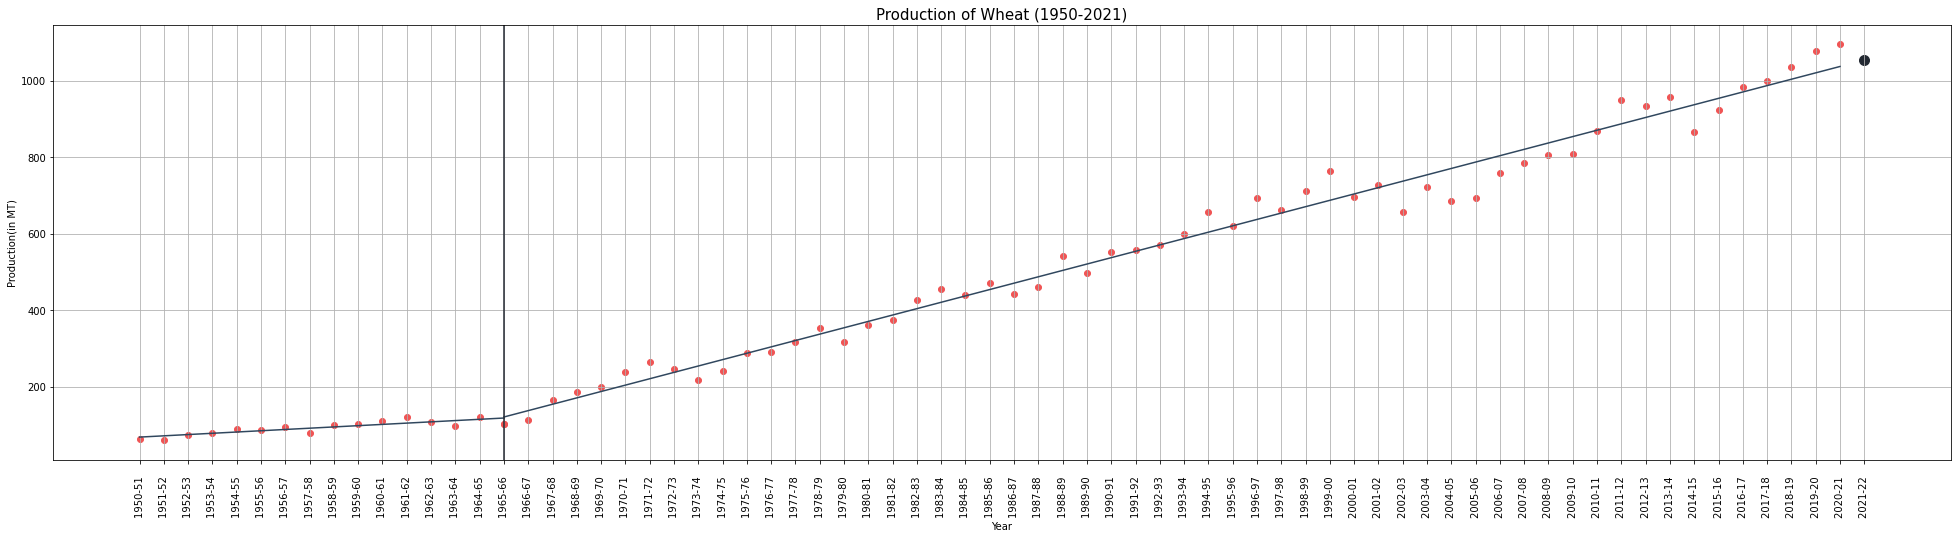

In [9]:
# --------------------------WHEAT PRODUCTION--------------------------
# Variables for Production
Id = np.array(wr_production['Id'])
wheatProduction = np.array(wr_production['Wheat'])
year = np.array(wr_production['Year'])
# --------------------------
plt.subplots(figsize=(34,8))

drawRegressionPlot(Id[:16], wheatProduction[:16])
wp_estimate = drawRegressionPlot(Id[15:], wheatProduction[15:])
plt.axvline(15, color = "#222831")
plt.scatter(wrp_len, wp_estimate['estimate'](wrp_len), s=100, marker='o', color='#222831')

Id = np.append(Id, wrp_len)
year = np.append(year, str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + "   ")
plt.xticks(Id, year, rotation = 90)
year = np.delete(year, -1)

plt.title('Production of Wheat (' + year[0][:4] + '-' + year[-1][:2] + year[-1][-5:-3] + ')',fontsize=15)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Production(in MT)", fontsize = 10)
plt.grid()

print("\t The equation of the regression line is: ", wp_estimate['eqn'])
print("\t The estimate production of Wheat in " + str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + " would be:", wp_estimate['estimate'](wrp_len),"(in Million Tonnes)")
plt.show
# --------------------------

	 The equation of the regression line is:  y= (82419.1133)+(54265.2429)*x
	 The estimated Export of Wheat in 2021-22 would be: 1927437.37 (in Million Tonnes)


<function matplotlib.pyplot.show(close=None, block=None)>

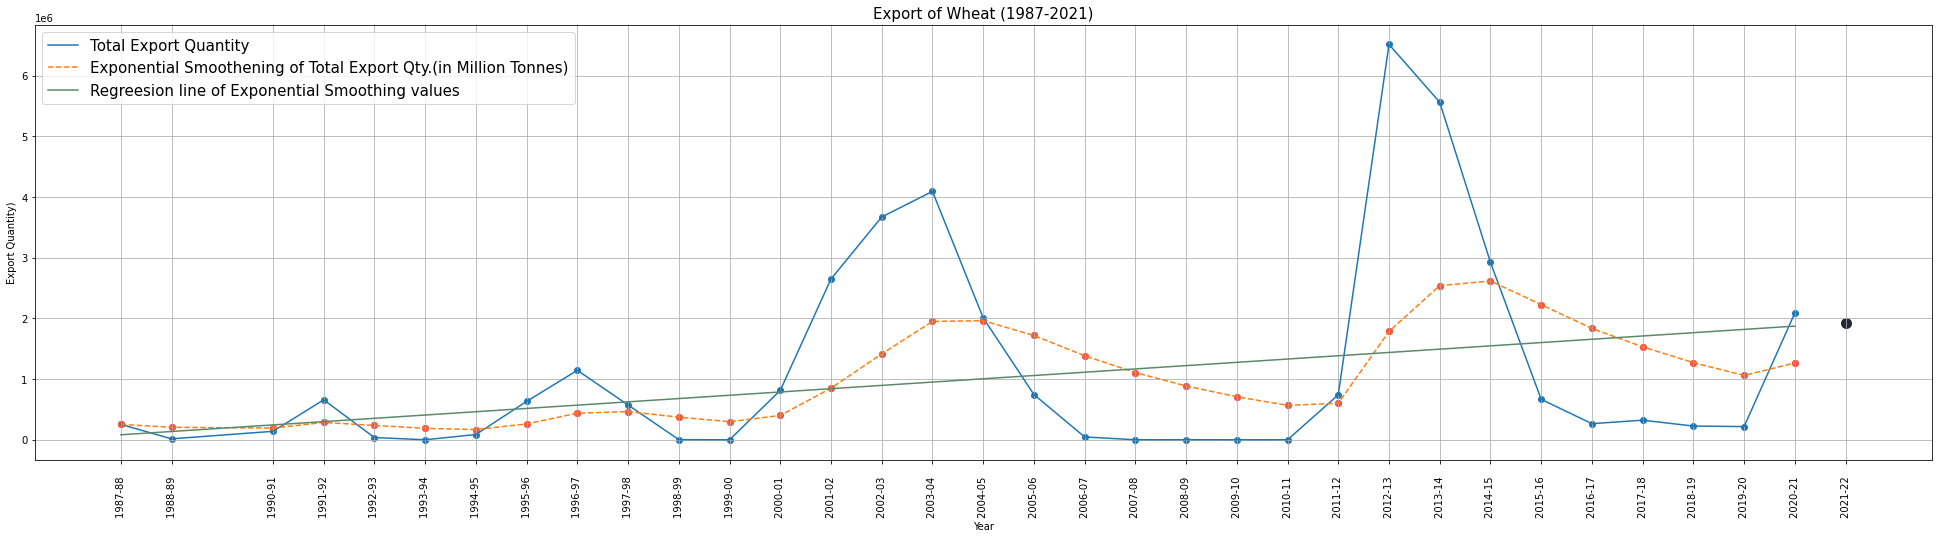

In [12]:
# --------------------------WHEAT Export--------------------------
# Variables for Export
Id = np.array(wr_export['Id'])
year = np.array(wr_export['Year'])
Quantity_of_wheatExported = wr_export["Quantity of Wheat Exported"]
# --------------------------
plt.subplots(figsize=(34,8))

we_estimate = drawSmoothedRegressionPlot(Id, Quantity_of_wheatExported, "Total Export Quantity", "Exponential Smoothening of Total Export Qty.(in Million Tonnes)", "Regreesion line of Exponential Smoothing values", "#59886b")
plt.scatter(wre_len, we_estimate["estimate"](wre_len), c='#222831', s=100)

plt.title('Export of Wheat (' + year[0][:4] + '-' + year[-1][:2] + year[-1][-5:-3] + ')',fontsize=15)

Id = np.append(Id, wre_len)
year = np.append(year, str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + "   ")
plt.xticks(Id, year, rotation = 90)
year = np.delete(year, -1)

plt.xlabel("Year", fontsize = 10)
plt.ylabel("Export Quantity)", fontsize = 10)
plt.legend(fontsize = 15)
plt.grid()

print("\t The equation of the regression line is: ", we_estimate['eqn'])
print("\t The estimated Export of Wheat in " + str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + " would be:", we_estimate["estimate"](wre_len), "(in Million Tonnes)")
plt.show

	 The equation of the regression line is:  y= (75.205)+(15.5421)*x
	 The estimate production of Rice in 2021-22 would be: 1178.69 (in Million Tonnes)


<function matplotlib.pyplot.show(close=None, block=None)>

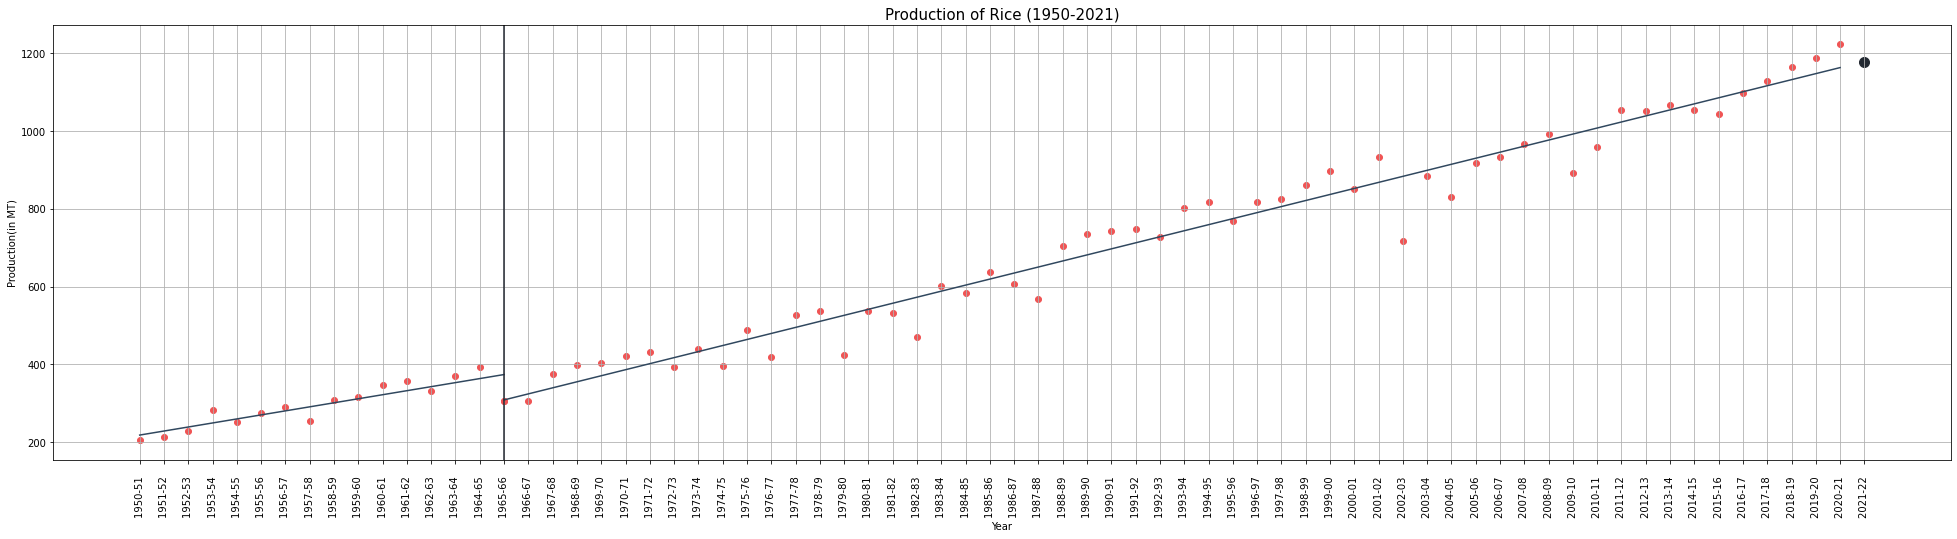

In [13]:
# --------------------------RICE PRODUCTION--------------------------
# Variables for Production
Id = np.array(wr_production['Id'])
riceProduction = np.array(wr_production['Rice'])
year = np.array(wr_production['Year'])
# --------------------------
plt.subplots(figsize=(34,8))

drawRegressionPlot(Id[:16], riceProduction[:16])
rp_estimate = drawRegressionPlot(Id[15:], riceProduction[15:])
plt.axvline(15, color = "#222831")
plt.scatter(wrp_len, rp_estimate['estimate'](wrp_len), s=100, marker='o', color='#222831')

Id = np.append(Id, wrp_len)
year = np.append(year, str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + "   ")
plt.xticks(Id, year, rotation = 90)
year = np.delete(year, -1)

plt.title('Production of Rice (' + year[0][:4] + '-' + year[-1][:2] + year[-1][-5:-3] + ')',fontsize=15)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Production(in MT)", fontsize = 10)
plt.grid()

print("\t The equation of the regression line is: ", rp_estimate['eqn'])
print("\t The estimate production of Rice in " + str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + " would be:", rp_estimate['estimate'](wrp_len),"(in Million Tonnes)")
plt.show
# --------------------------

	 The equation of the regression line is:  y= (-1311067.365)+(308987.6721)*x
	 The estimated Export of Rice in 2021-22 would be: 9194513.49 (in Million Tonnes)


<function matplotlib.pyplot.show(close=None, block=None)>

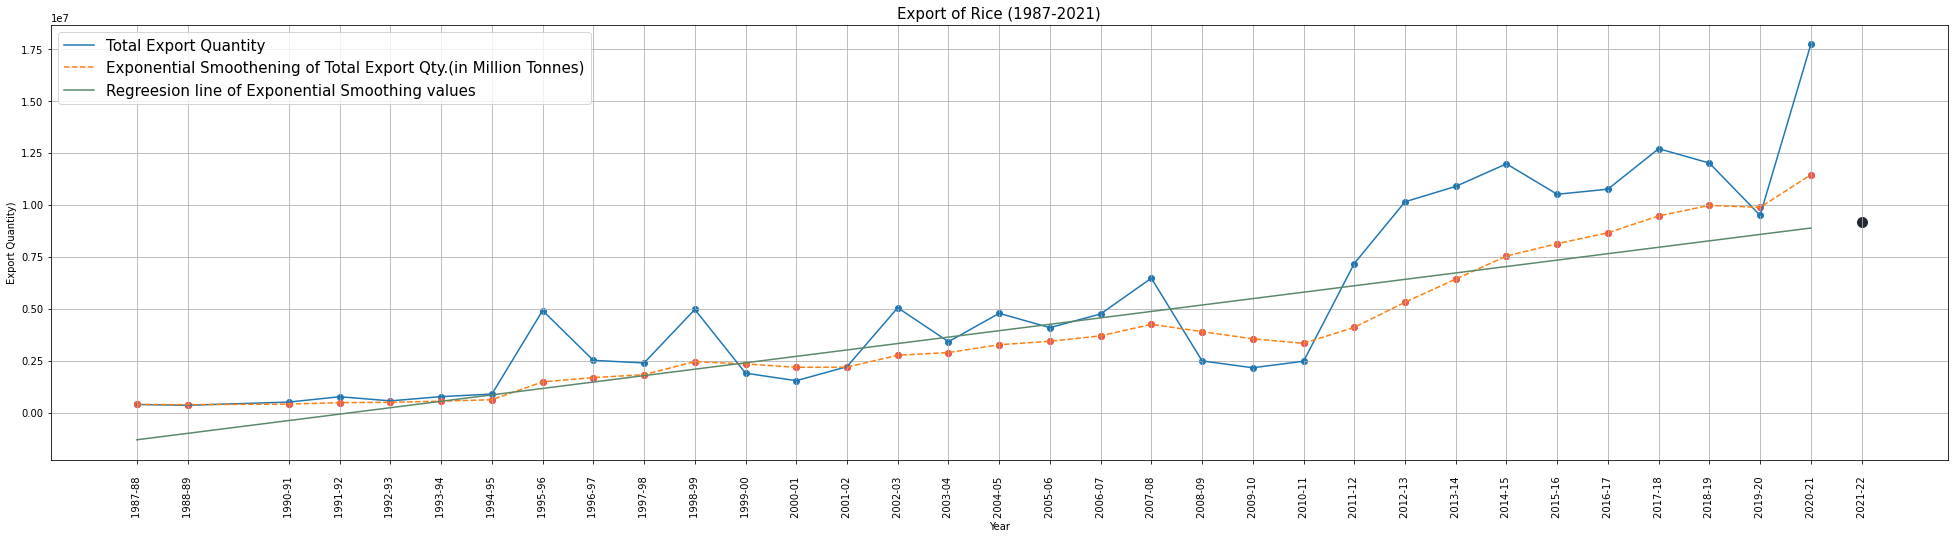

In [14]:
# --------------------------RICE Export--------------------------
# Variables for Export
Id = np.array(wr_export['Id'])
year = np.array(wr_export['Year'])
Quantity_of_riceExported = wr_export["Quantity of Rice Exported"]
# --------------------------
plt.subplots(figsize=(34,8))

re_estimate = drawSmoothedRegressionPlot(Id, Quantity_of_riceExported, "Total Export Quantity", "Exponential Smoothening of Total Export Qty.(in Million Tonnes)", "Regreesion line of Exponential Smoothing values", "#59886b")
plt.scatter(wre_len, re_estimate["estimate"](wre_len), c='#222831', s=100)

plt.title('Export of Rice (' + year[0][:4] + '-' + year[-1][:2] + year[-1][-5:-3] + ')',fontsize=15)

Id = np.append(Id, wre_len)
year = np.append(year, str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + "   ")
plt.xticks(Id, year, rotation = 90)
year = np.delete(year, -1)

plt.xlabel("Year", fontsize = 10)
plt.ylabel("Export Quantity)", fontsize = 10)
plt.legend(fontsize = 15)
plt.grid()

print("\t The equation of the regression line is: ", re_estimate['eqn'])
print("\t The estimated Export of Rice in " + str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-5:-3])+1) + " would be:", re_estimate["estimate"](wre_len), "(in Million Tonnes)")
plt.show

In [15]:
sww_production = pd.read_csv(data_folder / "StatewiseWheatProduction.csv")
swwp_len = len(sww_production)

	 The equation of the regression line is:  y= (9.4673)+(-0.1218)*x
	 The estimated Production of Wheat in Andhra Pradesh in 2021-22 would be: 5.69 (in Lakh Tonnes)


	 The equation of the regression line is:  y= (6.8226)+(-0.0381)*x
	 The estimated Production of Wheat in Arunachal Pradesh in 2021-22 would be: 5.64 (in Lakh Tonnes)


	 The equation of the regression line is:  y= (116.83)+(-2.6739)*x
	 The estimated Production of Wheat in Assam in 2021-22 would be: 33.94 (in Lakh Tonnes)


	 The equation of the regression line is:  y= (3595.9862)+(43.8522)*x
	 The estimated Production of Wheat in Bihar in 2021-22 would be: 4955.4 (in Lakh Tonnes)


	 The equation of the regression line is:  y= (-23.6762)+(5.8143)*x
	 The estimated Production of Wheat in Chhattisgarh in 2021-22 would be: 156.57 (in Lakh Tonnes)


	 The equation of the regression line is:  y= (97.3676)+(-0.9113)*x
	 The estimated Production of Wheat in NCT of Delhi in 2021-22 would be: 69.12 (in Lakh Tonnes)


	 The equati

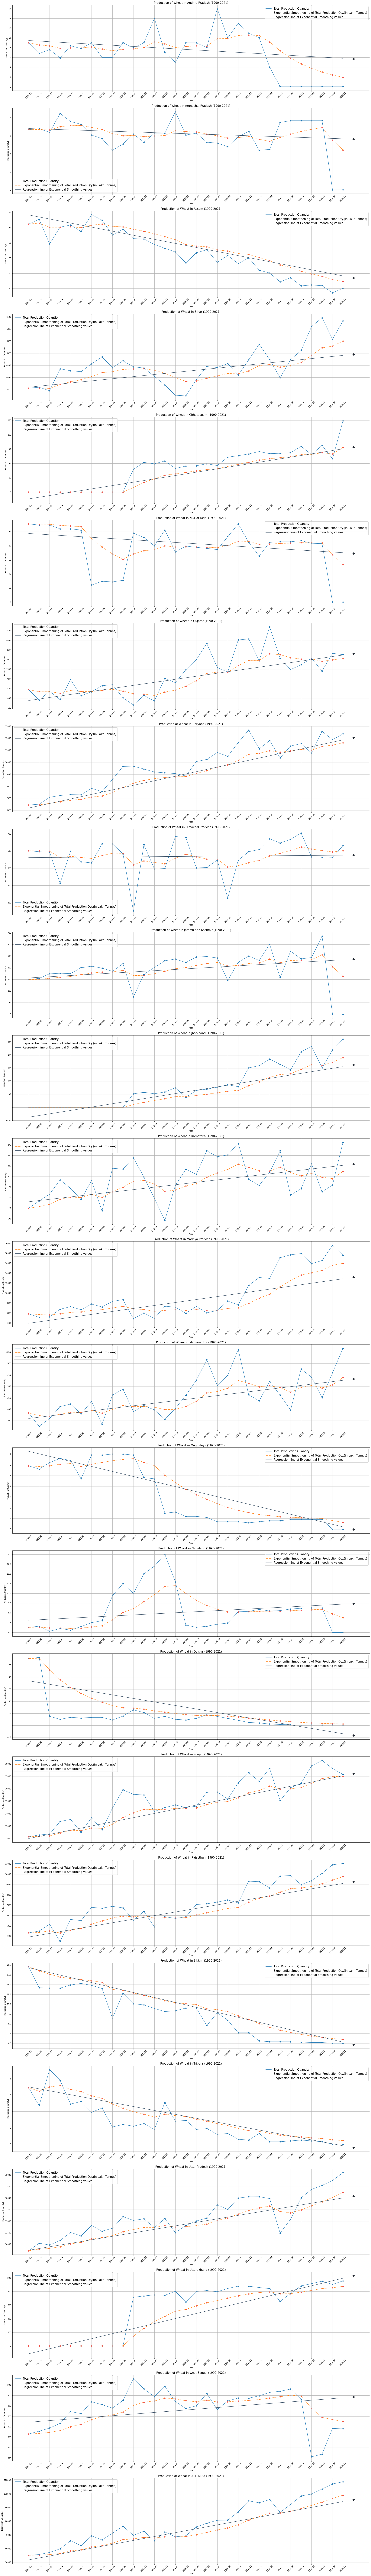

In [17]:
States = list(sww_production.columns[1:])
year = list(sww_production["Year"])

plt.subplots(figsize=(34,10*len(States)))
i = 1
swwp_estimates = []
for state in States:
    plt.subplot(len(States), 1, i)
    i = i+1
    swwp_estimate = drawSmoothedRegressionPlot(np.array(range(swwp_len)), sww_production[state],"Total Production Quantity", "Exponential Smoothening of Total Production Qty.(in Lakh Tonnes)", "Regreesion line of Exponential Smoothing values")
    swwp_estimates.append(swwp_estimate["estimate"](swwp_len))
    plt.scatter(swwp_len, swwp_estimate["estimate"](swwp_len), c='#222831', s=100)
    plt.title('Production of Wheat in ' + state + ' (' + year[0][:4] + '-' + year[-1][:2] + year[-1][-2:] + ')',fontsize=15)
    print("\t The equation of the regression line is: ", swwp_estimate['eqn'])
    print("\t The estimated Production of Wheat in " + state + " in " + str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-2:])+1) + " would be:", swwp_estimate["estimate"](swwp_len), "(in Lakh Tonnes)")
    print("\n")
    plt.xticks(np.array(range(swwp_len)), sww_production["Year"], rotation = 45)
    plt.xlabel("Year", fontsize = 10)
    plt.ylabel("Production Quantity)", fontsize = 10)
    plt.legend(fontsize = 15)
    plt.grid()

sww_production = sww_production.T
predicted_year = str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-2:])+1)
swwp_estimates.insert(0, predicted_year)
sww_production = sww_production.assign(estimate = swwp_estimates)
sww_production.to_csv(data_folder / "StatewiseWheatProductionEstimate.csv")

In [19]:
swr_production = pd.read_csv(data_folder / "StatewiseRiceProduction.csv")
swrp_len = len(swr_production)

	 The equation of the regression line is:  y= (10116.6147)+(-18.5972)*x
	 The estimated Production of Rice in Andhra Pradesh in 2021-22 would be: 9540.1 (in Million Tonnes)


	 The equation of the regression line is:  y= (114.0122)+(3.1865)*x
	 The estimated Production of Rice in Arunachal Pradesh in 2021-22 would be: 212.79 (in Million Tonnes)


	 The equation of the regression line is:  y= (2941.7168)+(59.8715)*x
	 The estimated Production of Rice in Assam in 2021-22 would be: 4797.73 (in Million Tonnes)


	 The equation of the regression line is:  y= (5697.9405)+(-0.88)*x
	 The estimated Production of Rice in Bihar in 2021-22 would be: 5670.66 (in Million Tonnes)


	 The equation of the regression line is:  y= (4848.4411)+(25.6105)*x
	 The estimated Production of Rice in Chhattisgarh in 2021-22 would be: 5642.37 (in Million Tonnes)


	 The equation of the regression line is:  y= (4.2526)+(0.6258)*x
	 The estimated Production of Rice in NCT of Delhi in 2021-22 would be: 23.65 (in Mil

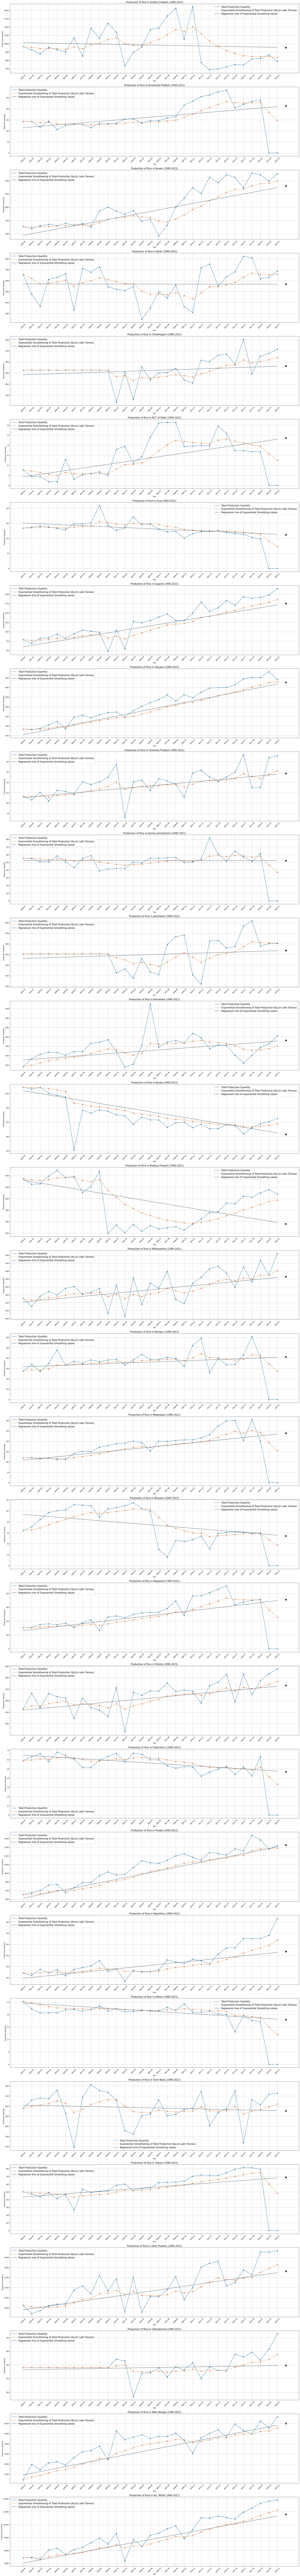

In [20]:
States = list(swr_production.columns[1:])
year = list(swr_production["Year"])

plt.subplots(figsize=(34,10*len(States)))
i = 1
swrp_estimates = []
for state in States:
    plt.subplot(len(States), 1, i)
    i = i+1
    swrp_estimate = drawSmoothedRegressionPlot(np.array(range(swrp_len)), swr_production[state], "Total Production Quantity", "Exponential Smoothening of Total Production Qty.(in Lakh Tonnes)", "Regreesion line of Exponential Smoothing values")
    swrp_estimates.append(swrp_estimate["estimate"](swrp_len))
    plt.scatter(swrp_len, swrp_estimate["estimate"](swrp_len), c='#222831', s=100)
    plt.title('Production of Rice in ' + state + ' (' + year[0][:4] + '-' + year[-1][:2] + year[-1][-2:] + ')',fontsize=15)
    print("\t The equation of the regression line is: ", swrp_estimate['eqn'])
    print("\t The estimated Production of Rice in " + state + " in " + str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-2:])+1) + " would be:", swrp_estimate["estimate"](swrp_len), "(in Million Tonnes)")
    print("\n")
    plt.xticks(np.array(range(swrp_len)), swr_production["Year"], rotation = 45)
    plt.xlabel("Year", fontsize = 10)
    plt.ylabel("Production Quantity)", fontsize = 10)
    plt.legend(fontsize = 15)
    plt.grid()
swr_production = swr_production.T
predicted_year = str(int(year[-1][:4])+1) + '-' + str(int(year[-1][-2:])+1)
swrp_estimates.insert(0, predicted_year)
swr_production = swr_production.assign(estimate = swrp_estimates)
swr_production.to_csv(data_folder / "StatewiseRiceProductionEstimate.csv")